## Practica Semanal Calificada

Ud va a desarrollar un modelo de clasificacion binaria utilizando **regresion logistica** para determinar si un paciente tiene o no un padecimiento cardiaco.

La variable a predecir es la variable "target" la cual tiene valores de 1 y 0. Donde 1 es que el paciente tiene un padecimiento cardiaco.

Los atributos X son los siguientes:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

El dataset contiene 303 registros de un hospital de Cleveland. Es recomendable que lea el siguiente [paper](https://www.researchgate.net/publication/309210947_Heart_Disease_prediction_using_Machine_learning_and_Data_Mining_Technique/link/5805eb0f08ae03256b75d9a1/download) para que obtenga un mejor conocimiento sobre el trasfondo del problema. 

In [36]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# EJERCICIO - Feature Engineering
# En esta seccion incluya transformaciones, scaling, eliminar o crear variables segun considere apropiado.

data = pd.read_csv("data/heart.csv")

# variable respuesta
y = data.target

# variables independendientes
data = data.drop(['target'], axis=1)
X = data

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
# EJERCICIO - Entrenar Modelo & Resampling
# Utilize SKlearn para entrenar el modelo de logistic regression. 
# Como ud solo tiene este dataset, recuerde utilizar la mejor tecnica de resampling. (ver notebook #2)

model = LogisticRegressionCV(cv=10, random_state=0, max_iter=1000).fit(X, y)
y_prima = model.predict(X)

              precision    recall  f1-score   support

          no       0.91      0.76      0.83       138
          si       0.82      0.94      0.88       165

    accuracy                           0.86       303
   macro avg       0.87      0.85      0.85       303
weighted avg       0.86      0.86      0.86       303

Acc: 0.858085808580858


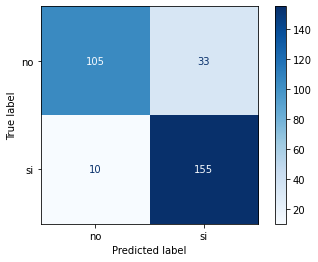

Desplegar Matriz
[[105  33]
 [ 10 155]]


In [39]:
# EJERCICIO - Metricas y Evaluacion
# Implemente la matrix de confusion y calcule todas las metricas del notebook #4 utilizando classification_report 
# y accuracy_score. Considere el resultado obtenido e itere sobre todo el notebook hasta sentirse satisfecho con
# los resultados. 
# ** ES VALIDO HACER BENCHMARK CON SUS COMPANEROS DE CLASE ** pueden postear sus metricas en el Grupo de WA para
# comparar resultados.

clases = ["no","si"]

print(classification_report(y, y_prima, target_names=clases))

print("Acc:",accuracy_score(y, y_prima))

# Confusion Matrix
disp = plot_confusion_matrix(model, X, y,
                             display_labels=clases,
                             cmap=plt.cm.Blues,
                             normalize=None)
plt.show()

print("Desplegar Matriz")
print(disp.confusion_matrix)

In [15]:
# Bienvenidos al mundo de machine learning!